In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
import pandas as pd

In [ ]:
#choose the range of the dates


start=dt.datetime(2015,1,1)
end=dt.datetime(2021,6,30)

In [ ]:
#choose the company

company='NVDA'


data=web.DataReader(company, 'yahoo',start,end)

In [ ]:

data1= data.reset_index()


In [ ]:
data1

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,20.280001,19.809999,20.129999,20.129999,2842000.0,19.363665
1,2015-01-05,20.190001,19.700001,20.129999,19.790001,4948800.0,19.036613
2,2015-01-06,19.840000,19.170000,19.820000,19.190001,4944100.0,18.459450
3,2015-01-07,19.500000,19.080000,19.330000,19.139999,8045200.0,18.411348
4,2015-01-08,19.980000,19.350000,19.360001,19.860001,7094500.0,19.103949
...,...,...,...,...,...,...,...
1627,2021-06-21,741.460022,712.909973,737.409973,737.090027,16809600.0,737.090027
1628,2021-06-22,758.549988,735.440002,738.859985,755.469971,14503600.0,755.469971
1629,2021-06-23,766.109985,756.309998,760.309998,762.289978,8308900.0,762.289978
1630,2021-06-24,776.799988,763.530029,769.109985,768.219971,8023100.0,768.219971


In [ ]:
data2=data1[['Date','Close']]

In [ ]:
data2

,Date,Close
0,2015-01-02,20.129999
1,2015-01-05,19.790001
2,2015-01-06,19.190001
3,2015-01-07,19.139999
4,2015-01-08,19.860001
...,...,...
1627,2021-06-21,737.090027
1628,2021-06-22,755.469971
1629,2021-06-23,762.289978
1630,2021-06-24,768.219971


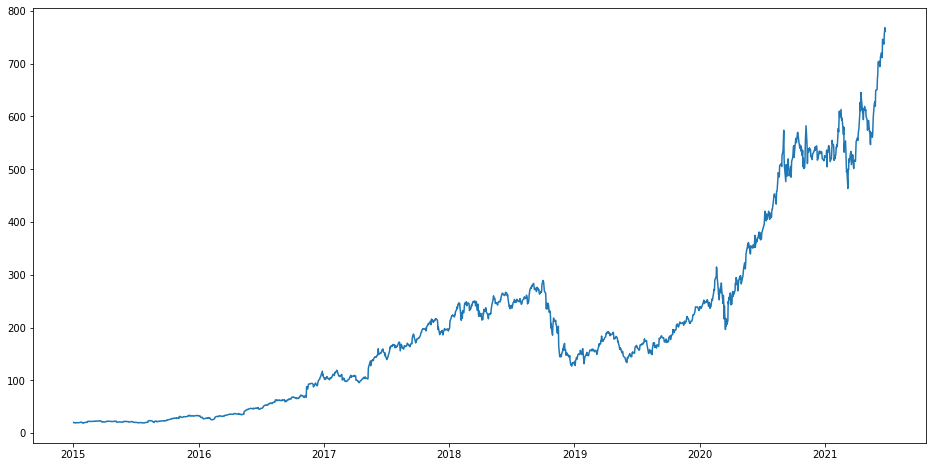

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'])

In [ ]:
data2.head(1511)

,Date,Close
0,2015-01-02,20.129999
1,2015-01-05,19.790001
2,2015-01-06,19.190001
3,2015-01-07,19.139999
4,2015-01-08,19.860001
...,...,...
1506,2020-12-24,519.750000
1507,2020-12-28,516.000000
1508,2020-12-29,517.729980
1509,2020-12-30,525.830017


In [ ]:

final_dataset_num=data2[['Close']]

#for testing we need real data - split into train data and test data
#try to predict the data of 2021 and compare it with the actual data (valid data)
#you need train and valid data for training the model

train_data=final_dataset_num[:1511]
valid_data=final_dataset_num[1511:]

new_dataset=data2
new_dataset.drop('Date',axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset_num)

#take the last 50 days and predict the very next day and then the 59 days after
prediction_days=50

x_train_data,y_train_data=[],[]

for i in range(prediction_days,len(train_data)):
    x_train_data.append(scaled_data[i-prediction_days:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)


x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
valid_data

,Close
1511,524.539978
1512,536.190002
1513,504.579987
1514,533.760010
1515,531.070007
...,...
1627,737.090027
1628,755.469971
1629,762.289978
1630,768.219971


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout


In [ ]:
import tensorflow as tf


In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-prediction_days:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)



1461/1461 - 30s - loss: 9.6394e-04


In [ ]:
X_test=[]
for i in range(prediction_days,inputs_data.shape[0]):
    X_test.append(inputs_data[i-prediction_days:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
X_test[0].shape

(50, 1)

In [ ]:
len(X_test)

121

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


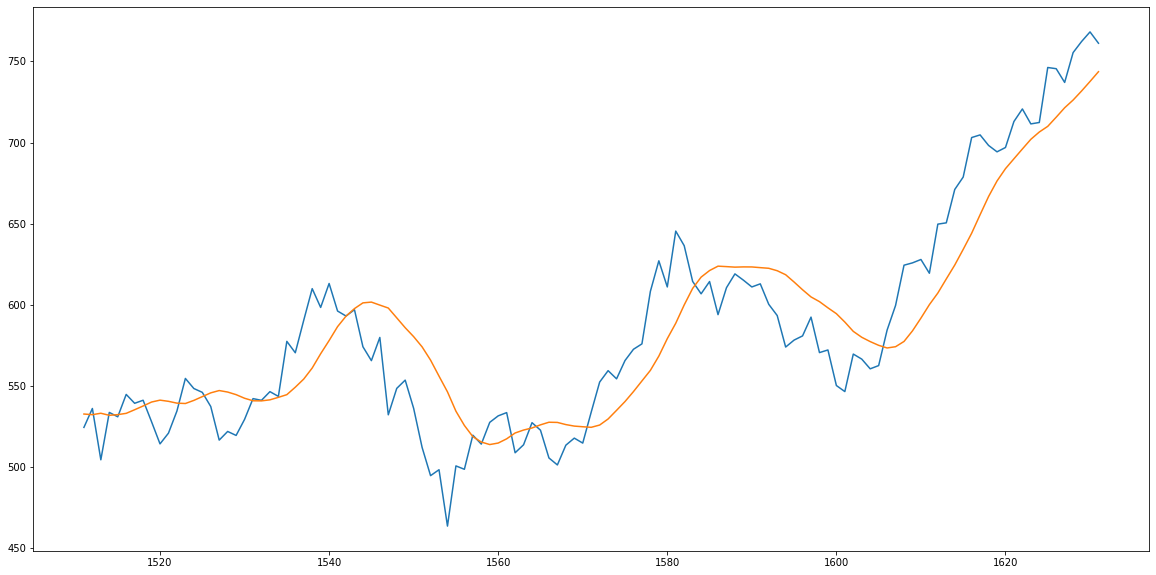

In [ ]:
valid_data['Predictions']=predicted_closing_price #orange line

#plt.plot(train_data["Close"])#green line
plt.plot(valid_data[['Close',"Predictions"]])

#the y axis are the rows not the year

In [ ]:
mean_square_error=((valid_data['Close']-valid_data['Predictions'])**2)/len(valid_data)


In [ ]:
mean_square_error


1511    0.560363
1512    0.119610
1513    6.796204
1514    0.026003
1515    0.014678
          ...   
1627    2.013721
1628    7.062563
1629    7.681126
1630    7.709447
1631    2.541366
Length: 121, dtype: float64

In [ ]:


#from google.colab import drive 
#drive.mount('/content/gdrive')


#valid_data.to_csv('prediction_MSFT')




In [ ]:
valid_data.tail(60)
                

,Close,Predictions
1572,552.469971,525.989868
1573,559.500000,529.729248
1574,554.460022,535.054504
1575,565.739990,540.477417
1576,572.679993,546.606262
1577,576.000000,553.158691
1578,608.359985,559.682556
1579,627.179993,568.474121
1580,611.080017,579.216187
1581,645.489990,588.711609


In [ ]:
#temporaly display 999 rows
with pd.option_context('display.max_rows', 1631):
    print (valid_data)

           Close  Predictions
1511  524.539978   532.774292
1512  536.190002   532.385681
1513  504.579987   533.256470
1514  533.760010   531.986206
1515  531.070007   532.402710
1516  544.859985   533.197693
1517  539.390015   535.422180
1518  541.270020   537.729004
1519  528.010010   540.166687
1520  514.380005   541.329224
1521  521.010010   540.604431
1522  534.630005   539.484253
1523  554.700012   539.261230
1524  548.500000   541.171692
1525  546.130005   543.498169
1526  537.409973   545.820984
1527  516.710022   547.243652
1528  522.039978   546.318298
1529  519.590027   544.717041
1530  529.479980   542.496338
1531  542.270020   540.938232
1532  541.219971   540.880188
1533  546.570007   541.523132
1534  543.640015   543.056824
1535  577.549988   544.714905
1536  570.530029   549.307739
1537  590.570007   554.329163
1538  610.030029   561.118713
1539  598.450012   569.921021
1540  613.210022   578.049805
1541  596.239990   586.618530
1542  593.159973   593.084778
1543  597.

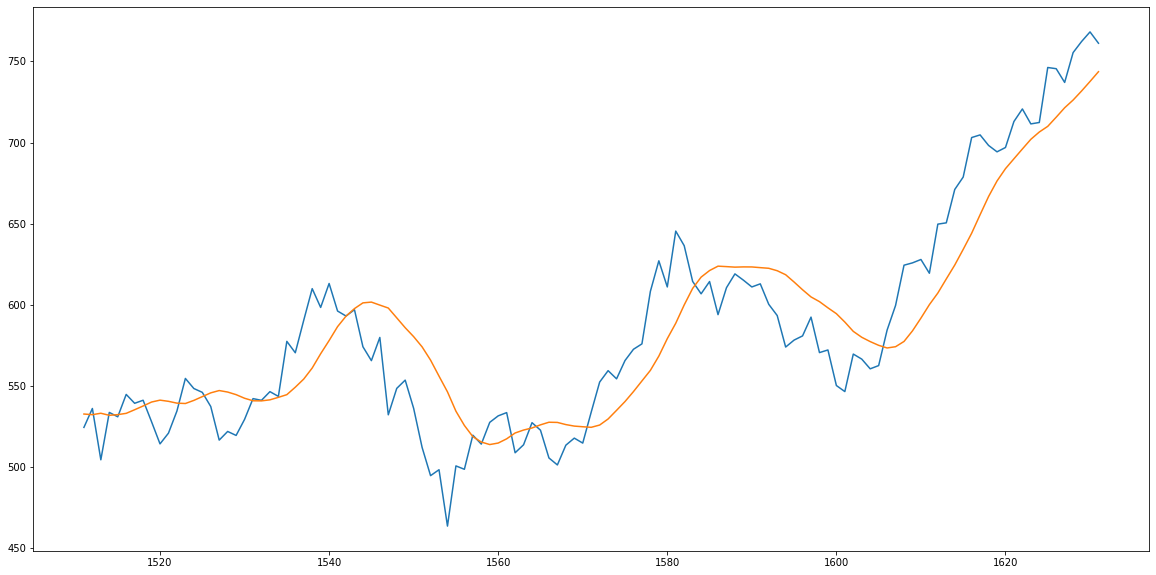

In [ ]:
#valid_data['Predictions']=predicted_closing_price #orange line

#plt.plot(train_data["Close"])#green line
plt.plot(valid_data[['Close',"Predictions"]])
#plt.plot(data2['Date','Close'])
#the y axis are the rows not the year

In [ ]:
#plt.plot(data[['Close']][1511:])
#plt.plot(valid_data[["Predictions"]])


In [ ]:
#plt.plot(train_data[['Close']][1511:])
#plt.plot(valid_data[["Predictions"])



In [ ]:
#data_plot=pd.concat(data[['Close']][1511:].reset_index,valid_data['Predictions'].reset_index)

In [ ]:
plotdata1=valid_data.reset_index

In [ ]:
plotdata2=data[['Close']][1511:].reset_index

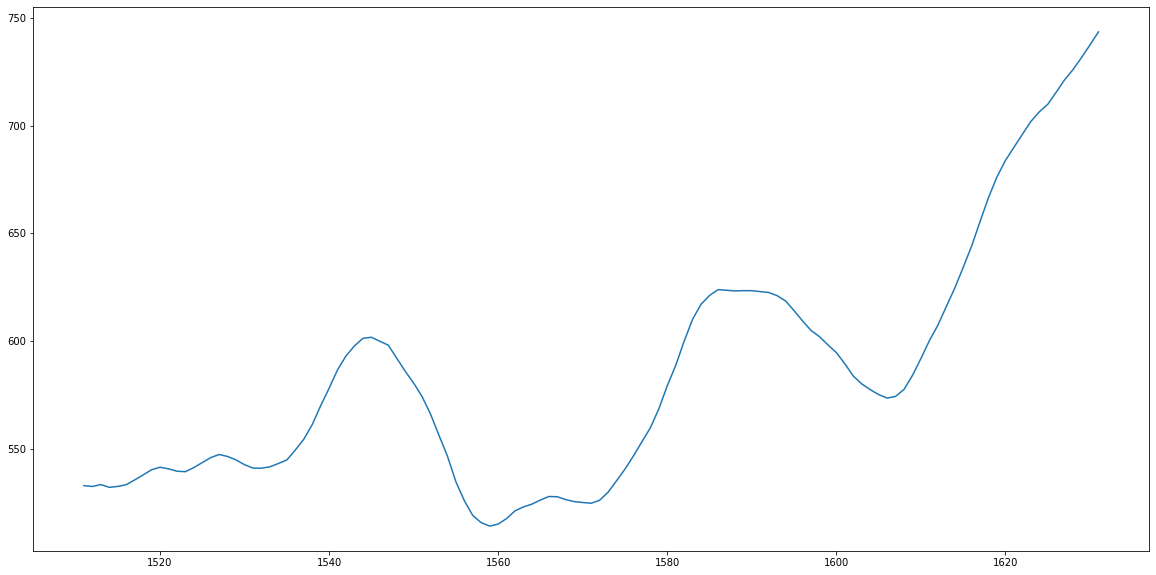

In [ ]:
plt.plot(valid_data[["Predictions"]])


In [ ]:
Date=data1['Date'][1511:]

In [ ]:
final_plot = pd.DataFrame(valid_data)
final_plot["Date"] = Date


final_plot.dtypes

Close                 float64
Predictions           float32
Date           datetime64[ns]
dtype: object

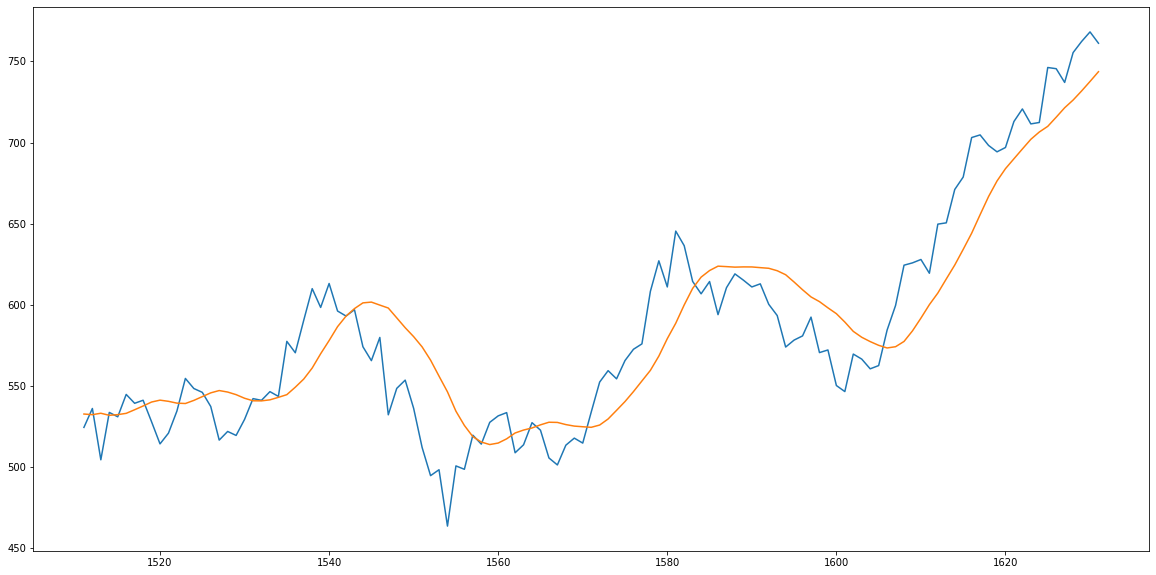

In [ ]:
import matplotlib.pyplot as plt

plt.plot(final_plot[['Close',"Predictions"]])


In [ ]:
final_plot

,Close,Predictions,Date
1511,524.539978,532.774292,2021-01-04
1512,536.190002,532.385681,2021-01-05
1513,504.579987,533.256470,2021-01-06
1514,533.760010,531.986206,2021-01-07
1515,531.070007,532.402710,2021-01-08
...,...,...,...
1627,737.090027,721.480408,2021-06-21
1628,755.469971,726.236938,2021-06-22
1629,762.289978,731.803650,2021-06-23
1630,768.219971,737.677490,2021-06-24


In [ ]:
#import datetime as dt

#plt.plot(final_plot.index,final_plot['Date'].dt)


In [ ]:
  predicted_closing_price=lstm_model.predict(X_test)

  print(predicted_closing_price)


[[0.6856869 ]
 [0.6851681 ]
 [0.6863306 ]
 [0.6846348 ]
 [0.68519086]
 [0.6862521 ]
 [0.68922174]
 [0.6923013 ]
 [0.6955555 ]
 [0.6971075 ]
 [0.6961399 ]
 [0.69464445]
 [0.6943467 ]
 [0.69689715]
 [0.7000029 ]
 [0.70310384]
 [0.7050031 ]
 [0.7037677 ]
 [0.7016301 ]
 [0.6986655 ]
 [0.6965855 ]
 [0.69650805]
 [0.6973663 ]
 [0.6994138 ]
 [0.70162725]
 [0.70775855]
 [0.71446204]
 [0.7235258 ]
 [0.7352767 ]
 [0.7461284 ]
 [0.75756735]
 [0.76619965]
 [0.7724078 ]
 [0.77711886]
 [0.7777623 ]
 [0.77529114]
 [0.7728767 ]
 [0.76479065]
 [0.75667477]
 [0.74933326]
 [0.7409185 ]
 [0.73003566]
 [0.71685994]
 [0.7039321 ]
 [0.6880306 ]
 [0.67629766]
 [0.667096  ]
 [0.6626554 ]
 [0.660581  ]
 [0.66182077]
 [0.6652925 ]
 [0.67009383]
 [0.6725094 ]
 [0.67422384]
 [0.6767943 ]
 [0.67893946]
 [0.6787916 ]
 [0.6770091 ]
 [0.6757655 ]
 [0.67522687]
 [0.67476386]
 [0.67662984]
 [0.68162185]
 [0.6887309 ]
 [0.6959703 ]
 [0.70415217]
 [0.71289945]
 [0.72160864]
 [0.73334515]
 [0.74768543]
 [0.7603616 ]
 [0.77

In [ ]:
future=[]
last_days=np.array([X_test[-1]])
for i in range(50):
  #last_days=np.reshape(last_days,(last_days.shape[0],last_days.shape[1],1))
  predicted=lstm_model.predict(last_days)[0][0]
  future.append(predicted)
  np.append(last_days,predicted)
  last_days=last_days[:,1:]
future=[scaler.inverse_transform([[x]]) for x in future]
future=[iii for i in future for ii in i for iii in ii]

#future=np.array(future)
print(future)



[743.7042477292553, 743.7024617834313, 743.6996489187586, 743.6954072974268, 743.6894690275622, 743.6807178930248, 743.6684841641309, 743.6514283815122, 743.6280324912186, 743.597403520338, 743.558157360857, 743.5082401750778, 743.4474733684183, 743.3746960760927, 743.2912031088235, 743.1932439803804, 743.081979555549, 742.9574098343292, 742.8320364374886, 742.7070648784584, 742.5974078048685, 742.510834081053, 742.461452679021, 742.4751598132198, 742.5757085631076, 742.7935046563371, 743.1781080895225, 743.7709081571338, 744.6326716658305, 745.7598713726102, 747.1584455473376, 748.7691007886579, 750.6400129851719, 752.5367320988418, 754.2735644126234, 755.415676767033, 755.3794667154526, 753.3164313969284, 748.2210386639363, 738.7962900104858, 723.3139703113957, 699.2871946554751, 664.5603710818741, 618.0503234483731, 557.7019638953643, 479.3639060037449, 388.1812810977035, 290.2351454104646, 190.25898091596017, 101.85254740134577]


In [ ]:
future

[743.7042477292553,
 743.7024617834313,
 743.6996489187586,
 743.6954072974268,
 743.6894690275622,
 743.6807178930248,
 743.6684841641309,
 743.6514283815122,
 743.6280324912186,
 743.597403520338,
 743.558157360857,
 743.5082401750778,
 743.4474733684183,
 743.3746960760927,
 743.2912031088235,
 743.1932439803804,
 743.081979555549,
 742.9574098343292,
 742.8320364374886,
 742.7070648784584,
 742.5974078048685,
 742.510834081053,
 742.461452679021,
 742.4751598132198,
 742.5757085631076,
 742.7935046563371,
 743.1781080895225,
 743.7709081571338,
 744.6326716658305,
 745.7598713726102,
 747.1584455473376,
 748.7691007886579,
 750.6400129851719,
 752.5367320988418,
 754.2735644126234,
 755.415676767033,
 755.3794667154526,
 753.3164313969284,
 748.2210386639363,
 738.7962900104858,
 723.3139703113957,
 699.2871946554751,
 664.5603710818741,
 618.0503234483731,
 557.7019638953643,
 479.3639060037449,
 388.1812810977035,
 290.2351454104646,
 190.25898091596017,
 101.85254740134577]

In [ ]:
print(last_days)

[]


In [ ]:
len(future)


50

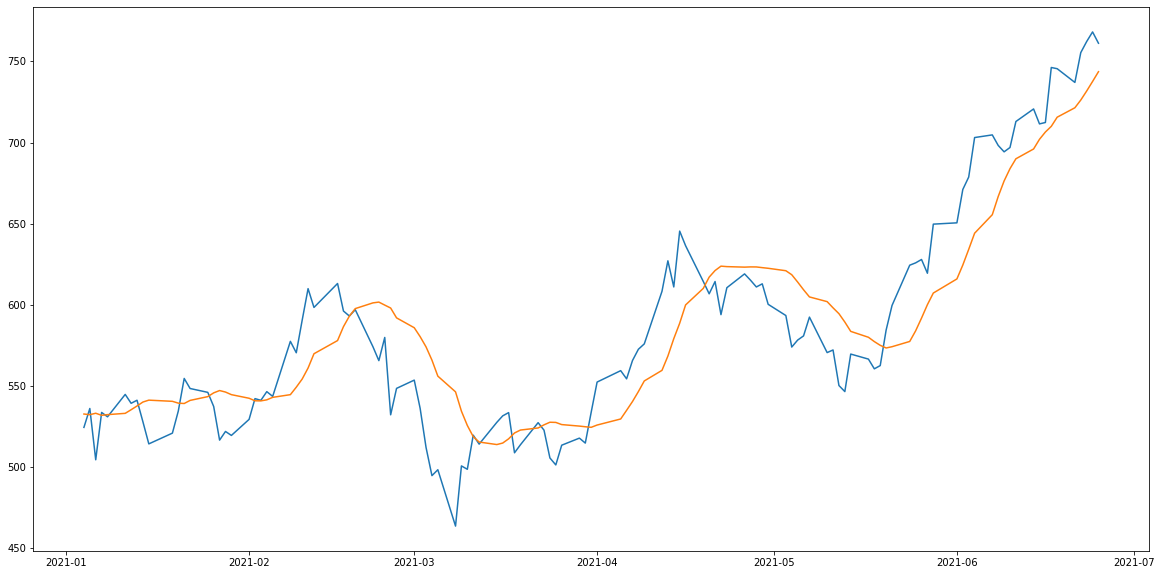

In [ ]:

#plt.plot(range(10),future)

final_plot=final_plot.set_index('Date')

plt.plot(final_plot[['Close',"Predictions"]])


In [ ]:
#np.array(future).shape
future

[743.7042477292553,
 743.7024617834313,
 743.6996489187586,
 743.6954072974268,
 743.6894690275622,
 743.6807178930248,
 743.6684841641309,
 743.6514283815122,
 743.6280324912186,
 743.597403520338,
 743.558157360857,
 743.5082401750778,
 743.4474733684183,
 743.3746960760927,
 743.2912031088235,
 743.1932439803804,
 743.081979555549,
 742.9574098343292,
 742.8320364374886,
 742.7070648784584,
 742.5974078048685,
 742.510834081053,
 742.461452679021,
 742.4751598132198,
 742.5757085631076,
 742.7935046563371,
 743.1781080895225,
 743.7709081571338,
 744.6326716658305,
 745.7598713726102,
 747.1584455473376,
 748.7691007886579,
 750.6400129851719,
 752.5367320988418,
 754.2735644126234,
 755.415676767033,
 755.3794667154526,
 753.3164313969284,
 748.2210386639363,
 738.7962900104858,
 723.3139703113957,
 699.2871946554751,
 664.5603710818741,
 618.0503234483731,
 557.7019638953643,
 479.3639060037449,
 388.1812810977035,
 290.2351454104646,
 190.25898091596017,
 101.85254740134577]

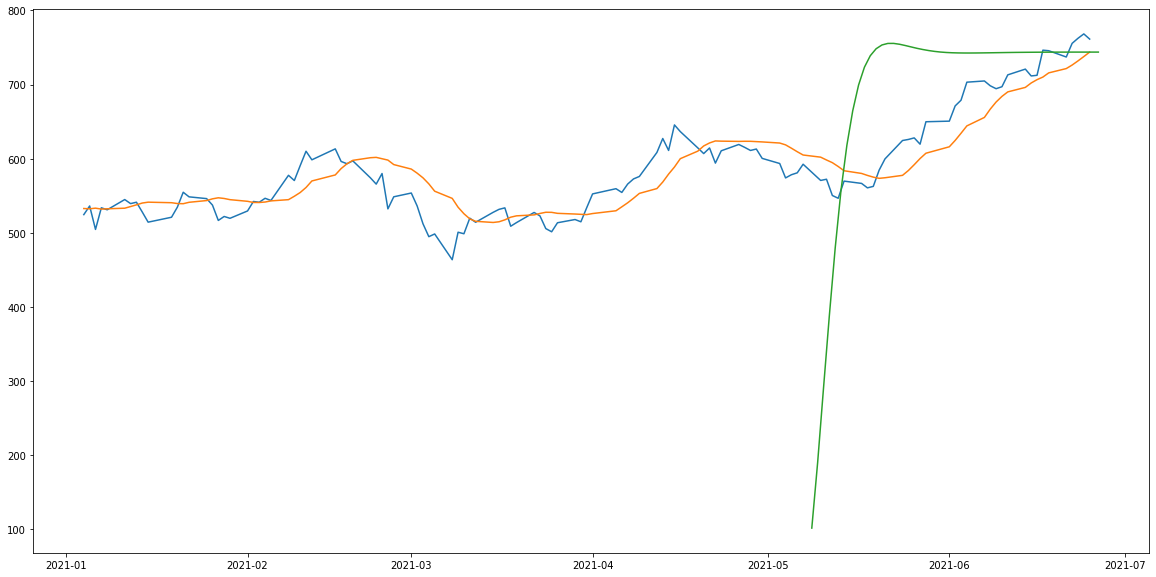

In [ ]:
Today=dt.datetime.today()
Dates=[Today - dt.timedelta(days=x) for x in range(50)]
plt.plot(final_plot[['Close',"Predictions"]])
plt.plot(Dates,future)


In [ ]:
y_test=[ii for i in predicted_closing_price for ii in i]


variable=y_test+future
len(variable)

171

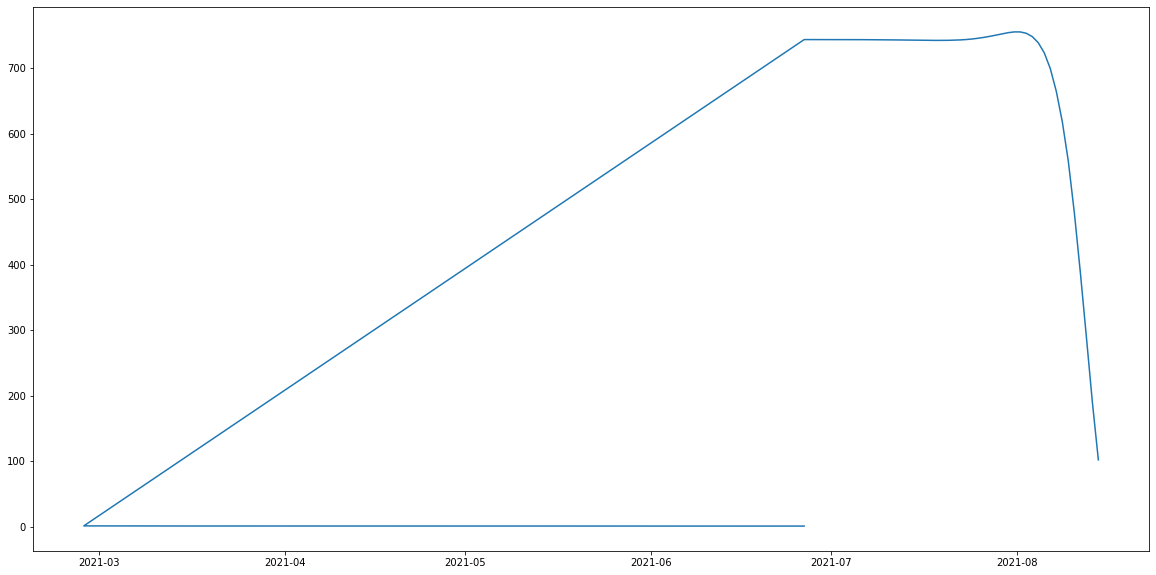

In [ ]:
Today=dt.datetime.today()

Dates_past=[Today - dt.timedelta(days=x) for x in range(121)]

Dates_future=[Today + dt.timedelta(days=x) for x in range(50)]

Dates_past.extend(Dates_future)

plt.plot(Dates_past,variable)

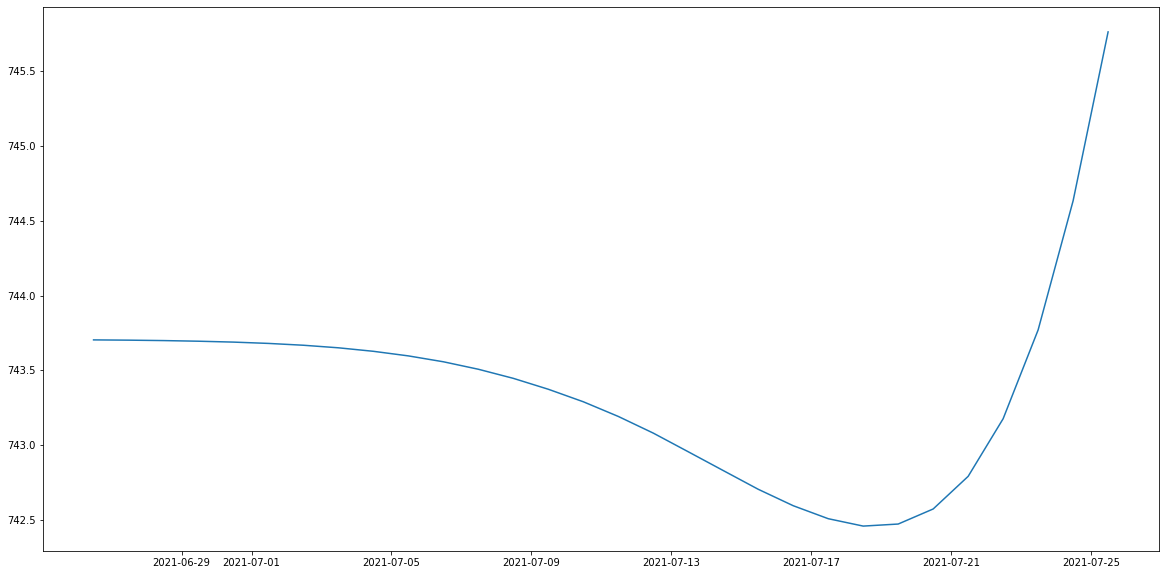

In [ ]:
Today=dt.datetime.today()



Dates_future=[Today + dt.timedelta(days=x) for x in range(30)]



plt.plot(Dates_future,future[:30])

In [ ]:
print(Dates)

[datetime.datetime(2021, 6, 26, 11, 37, 58, 994001), datetime.datetime(2021, 6, 25, 11, 37, 58, 994001), datetime.datetime(2021, 6, 24, 11, 37, 58, 994001), datetime.datetime(2021, 6, 23, 11, 37, 58, 994001), datetime.datetime(2021, 6, 22, 11, 37, 58, 994001), datetime.datetime(2021, 6, 21, 11, 37, 58, 994001), datetime.datetime(2021, 6, 20, 11, 37, 58, 994001), datetime.datetime(2021, 6, 19, 11, 37, 58, 994001), datetime.datetime(2021, 6, 18, 11, 37, 58, 994001), datetime.datetime(2021, 6, 17, 11, 37, 58, 994001), datetime.datetime(2021, 6, 16, 11, 37, 58, 994001), datetime.datetime(2021, 6, 15, 11, 37, 58, 994001), datetime.datetime(2021, 6, 14, 11, 37, 58, 994001), datetime.datetime(2021, 6, 13, 11, 37, 58, 994001), datetime.datetime(2021, 6, 12, 11, 37, 58, 994001), datetime.datetime(2021, 6, 11, 11, 37, 58, 994001), datetime.datetime(2021, 6, 10, 11, 37, 58, 994001), datetime.datetime(2021, 6, 9, 11, 37, 58, 994001), datetime.datetime(2021, 6, 8, 11, 37, 58, 994001), datetime.date

In [ ]:
predicted_closing_price

array([[0.6856869 ],
       [0.6851681 ],
       [0.6863306 ],
       [0.6846348 ],
       [0.68519086],
       [0.6862521 ],
       [0.68922174],
       [0.6923013 ],
       [0.6955555 ],
       [0.6971075 ],
       [0.6961399 ],
       [0.69464445],
       [0.6943467 ],
       [0.69689715],
       [0.7000029 ],
       [0.70310384],
       [0.7050031 ],
       [0.7037677 ],
       [0.7016301 ],
       [0.6986655 ],
       [0.6965855 ],
       [0.69650805],
       [0.6973663 ],
       [0.6994138 ],
       [0.70162725],
       [0.70775855],
       [0.71446204],
       [0.7235258 ],
       [0.7352767 ],
       [0.7461284 ],
       [0.75756735],
       [0.76619965],
       [0.7724078 ],
       [0.77711886],
       [0.7777623 ],
       [0.77529114],
       [0.7728767 ],
       [0.76479065],
       [0.75667477],
       [0.74933326],
       [0.7409185 ],
       [0.73003566],
       [0.71685994],
       [0.7039321 ],
       [0.6880306 ],
       [0.67629766],
       [0.667096  ],
       [0.662